In [1]:
import polars as pl
from polars import col as c

pl_pokemon = (
    pl.read_csv(
        source = "data/pokemon.csv",
        schema_overrides = {
            "Type 1": pl.Categorical,
            "Type 2": pl.Categorical,
            "Generation": pl.Categorical,
            "Legendary": pl.Boolean
        }
    )
    .drop("#")
    .rename(lambda col: col.strip().replace(" ", "_").replace(".", ""))
    .with_columns(Generation = c("Generation").cast(pl.Utf8).cast(pl.Enum(["1", "2", "3", "4", "5", "6"])))
)

In [2]:
pl_pokemon.head(5)

Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
str,cat,cat,i64,i64,i64,i64,i64,i64,i64,enum,bool
"""Bulbasaur""","""Grass""","""Poison""",318,45,49,49,65,65,45,"""1""",false
"""Ivysaur""","""Grass""","""Poison""",405,60,62,63,80,80,60,"""1""",false
"""Venusaur""","""Grass""","""Poison""",525,80,82,83,100,100,80,"""1""",false
"""VenusaurMega Venusaur""","""Grass""","""Poison""",625,80,100,123,122,120,80,"""1""",false
"""Charmander""","""Fire""",null,309,39,52,43,60,50,65,"""1""",false


# <span style="color:brown;">Matplotlib</span>

In [13]:
import matplotlib.pyplot as plt
import numpy as np

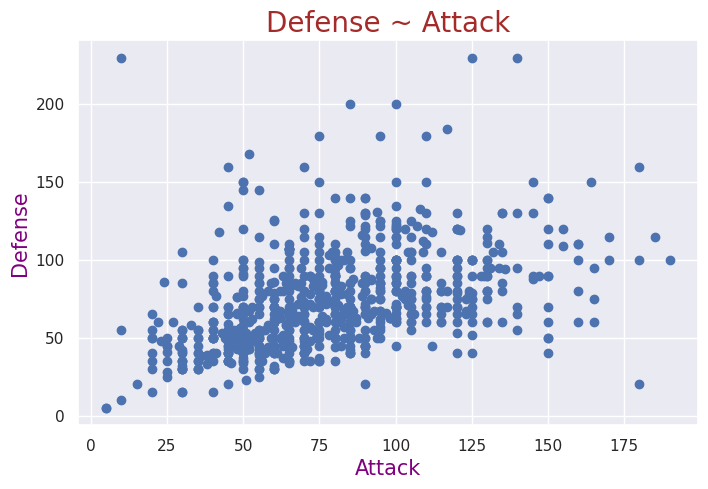

In [18]:
plt.figure(figsize=(8,5))
plt.scatter(x = pl_pokemon['Attack'], y = pl_pokemon['Defense'])
plt.xlabel("Attack", size = 15, color = "purple")
plt.ylabel("Defense", size = 15, color = "purple")
plt.title("Defense ~ Attack", size = 20, color = "brown")
plt.show()

Legendary_True
 shape: (6,)
Series: 'count' [u32]
[
	6
	5
	18
	13
	15
	8
]

Legendary_False
 shape: (6,)
Series: 'count' [u32]
[
	160
	101
	142
	108
	150
	74
]


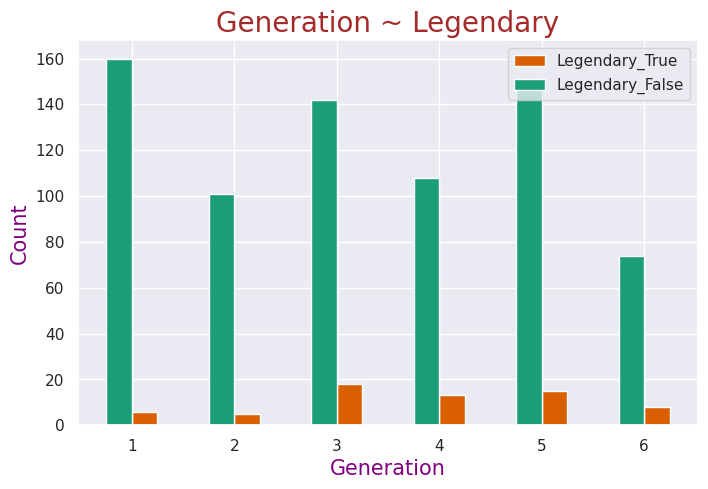

In [62]:
legendary_True = (
    pl_pokemon
    .filter(c('Legendary') == True)
    .group_by('Generation')
    .agg(count = pl.len())
    .sort(by = c('Generation'), descending=False)
    .get_column('count')
)

print('Legendary_True\n', legendary_True)
print()
###############################

legendary_False = (
    pl_pokemon
    .filter(c('Legendary') == False)
    .group_by('Generation')
    .agg(count = pl.len())
    .sort(by = c('Generation'), descending=False)
    .get_column('count')
)

print('Legendary_False\n', legendary_False)

###################################

x_coord = np.arange(6)+1
barwidth = 0.25

plt.figure(figsize=(8,5))
plt.bar(x = x_coord + barwidth/2, width = barwidth, height = legendary_True, color = '#d95f02', label = 'Legendary_True')
plt.bar(x = x_coord - barwidth/2, width = barwidth, height = legendary_False, color = '#1b9e77', label = 'Legendary_False')
plt.legend(loc = 1)
plt.xlabel('Generation', size = 15, color = "purple")
plt.ylabel('Count', size = 15, color = "purple")
plt.title("Generation ~ Legendary", size = 20, color = "brown")
plt.show()

# <span style="color:brown;">Seaborn</span>

In [7]:
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np

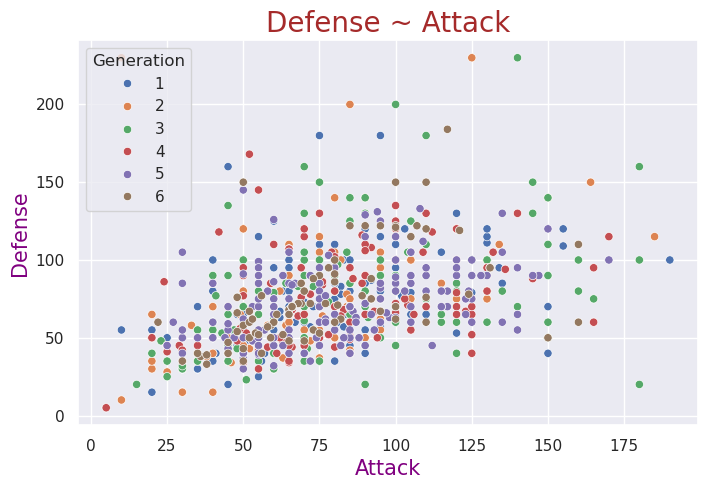

In [27]:
sbn.set_theme(style = "darkgrid")

plt.figure(figsize=(8,5))
sbn.scatterplot(data = pl_pokemon.to_pandas(), x = 'Attack', y = 'Defense', hue = 'Generation')
plt.xlabel("Attack", size = 15, color = "purple")
plt.ylabel("Defense", size = 15, color = "purple")
plt.title("Defense ~ Attack", size = 20, color = "brown")
plt.show()

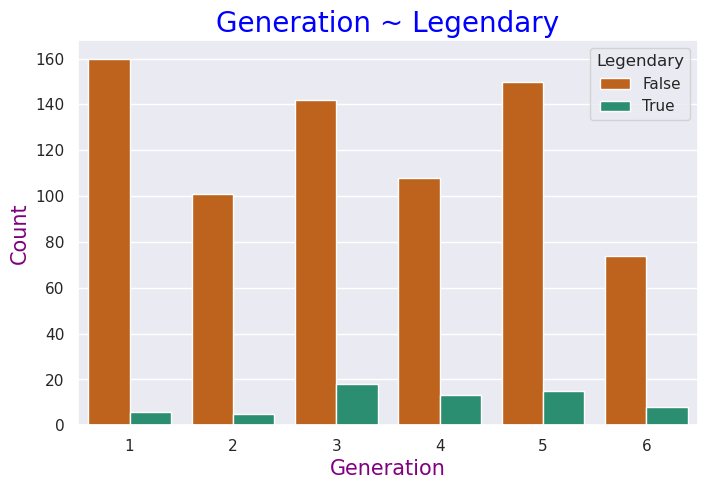

In [25]:
x_coord = np.arange(6)+1
barwidth = 0.25

plt.figure(figsize=(8,5))
sbn.countplot(data = pl_pokemon.to_pandas(), x = 'Generation', hue = 'Legendary', palette = ['#d95f02', '#1b9e77'])
plt.xlabel('Generation', size = 15, color = "purple")
plt.ylabel('Count', size = 15, color = "purple")
plt.title("Generation ~ Legendary", size = 20, color = "blue")
plt.show()

# <span style="color:brown;">Plotnine</span>

In [26]:
import plotnine as pln

/home/longdpt/miniconda3/envs/data/lib/python3.12/site-packages/plotnine/stats/smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


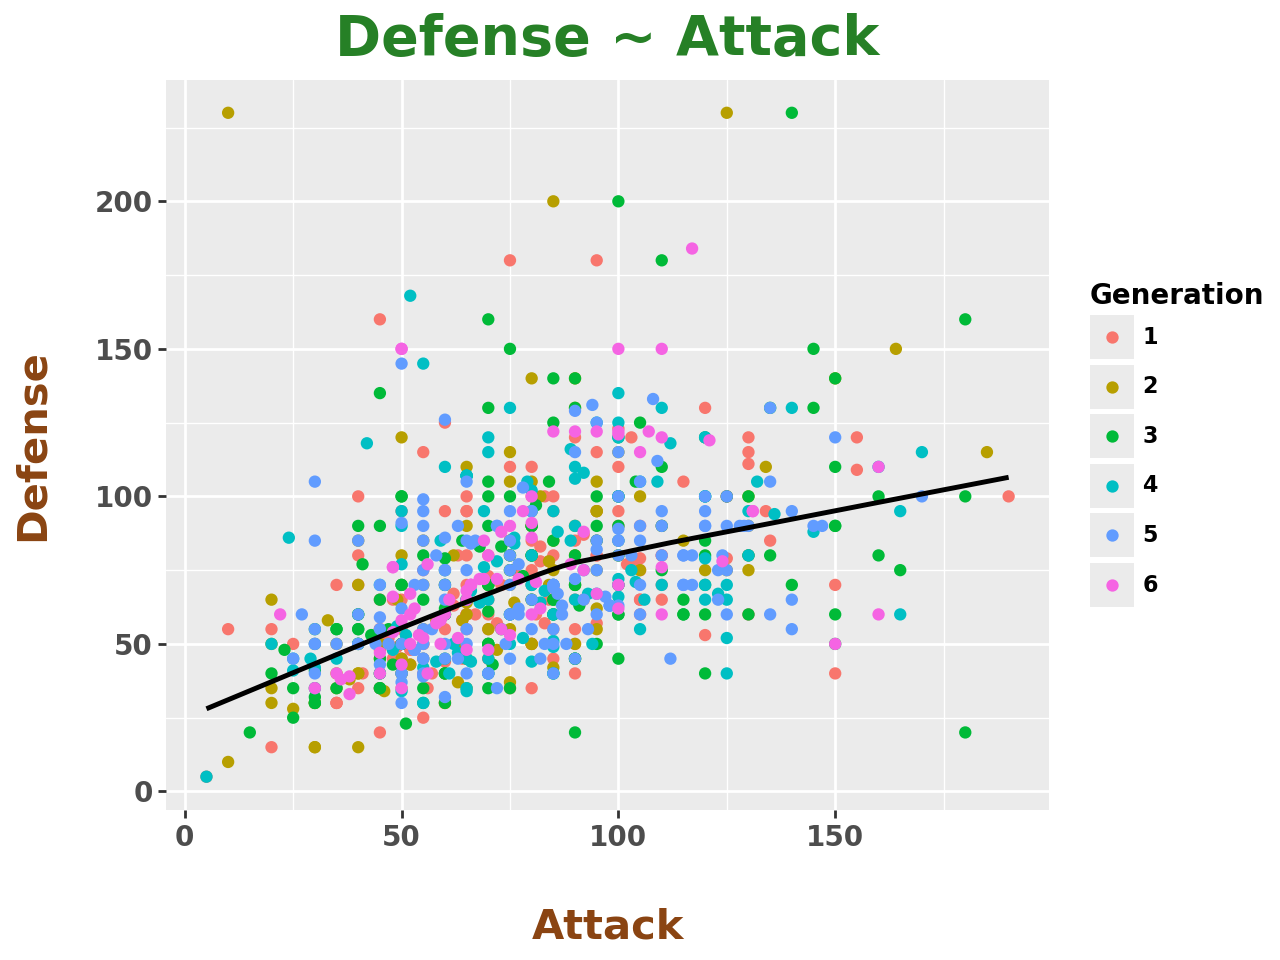

In [56]:
(
    pln.ggplot(data = pl_pokemon)
    + pln.theme_gray()
    + pln.geom_point(mapping = pln.aes(x = 'Attack', y = 'Defense', color = 'Generation'))
    + pln.geom_smooth(mapping = pln.aes(x = 'Attack', y = 'Defense'))
    + pln.ggtitle("Defense ~ Attack")
    + pln.theme(
        plot_title = pln.element_text(color = "#268026", size = 20, weight = "bold", ha = 0.5),
        axis_title_x = pln.element_text(color = "#8a4412", size = 15, weight = "bold", margin = {'t':15}),
        axis_text_x = pln.element_text(size = 10, weight = "bold"),
        axis_title_y = pln.element_text(color = "#8a4412", size = 15, weight = "bold", margin = {'r':15}),
        axis_text_y = pln.element_text(size = 10, weight = "bold"),
        legend_title = pln.element_text(size = 10, weight = "bold"),
        legend_text = pln.element_text(size = 8, weight = "bold")
    )
)

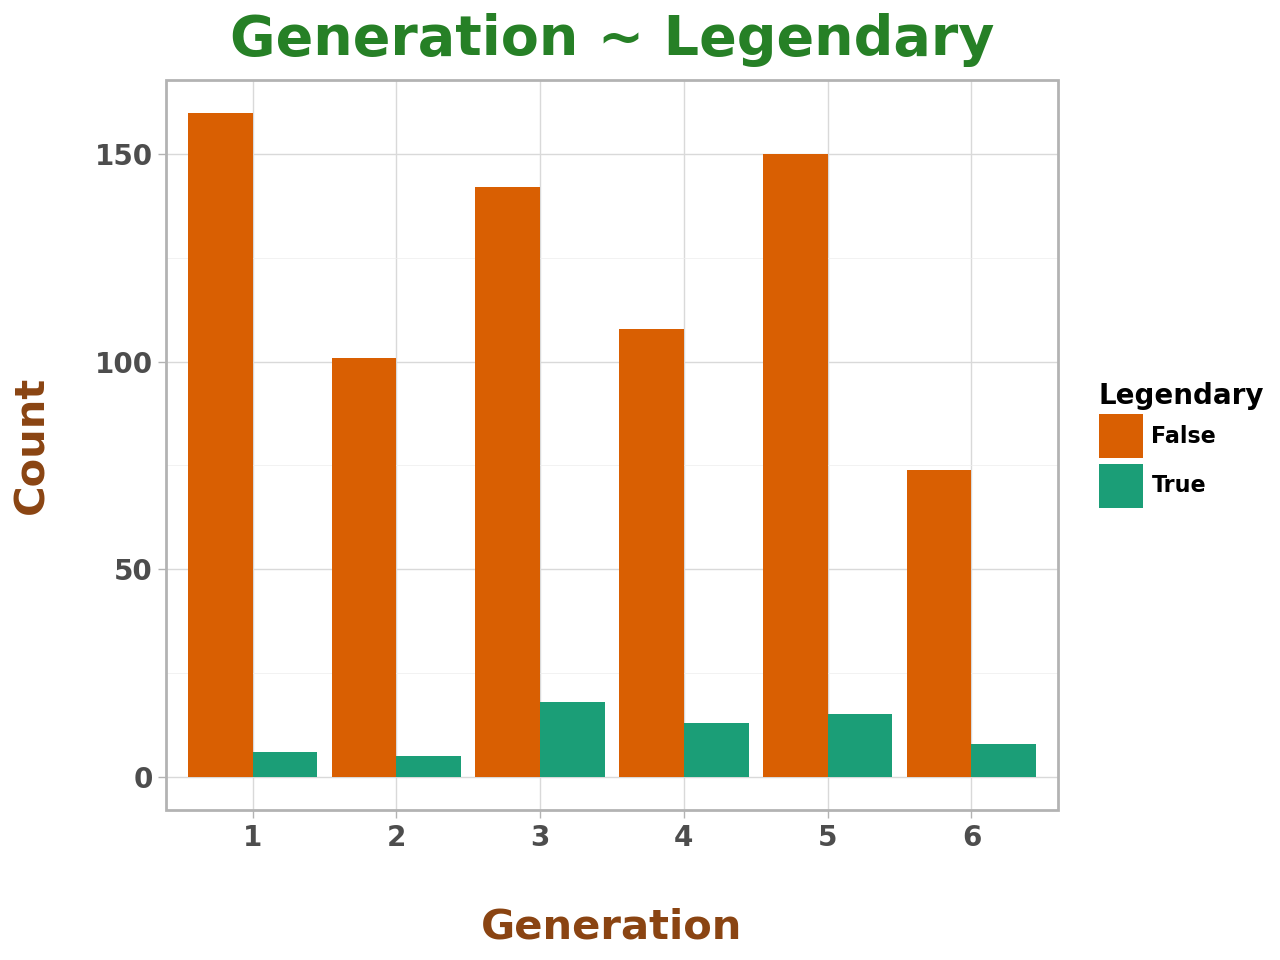

In [58]:
(
    pln.ggplot(data = pl_pokemon)
    + pln.theme_light()
    + pln.geom_bar(mapping = pln.aes(x = 'Generation', fill = 'Legendary'), position = 'dodge')
    + pln.scale_fill_manual(values = ['#d95f02', '#1b9e77'], name = 'Legendary') # coloring based on Legendary
    + pln.ggtitle("Generation ~ Legendary")
    + pln.ylab('Count')
    + pln.theme(
        plot_title = pln.element_text(color = "#268026", size = 20, weight = "bold", ha = 0.5),
        axis_title_x = pln.element_text(color = "#8a4412", size = 15, weight = "bold", margin = {'t':15}),
        axis_text_x = pln.element_text(size = 10, weight = "bold"),
        axis_title_y = pln.element_text(color = "#8a4412", size = 15, weight = "bold", margin = {'r':15}),
        axis_text_y = pln.element_text(size = 10, weight = "bold"),
        legend_title = pln.element_text(size = 10, weight = "bold"),
        legend_text = pln.element_text(size = 8, weight = "bold")
    )
)

# <span style="color:brown;">Plotly</span>

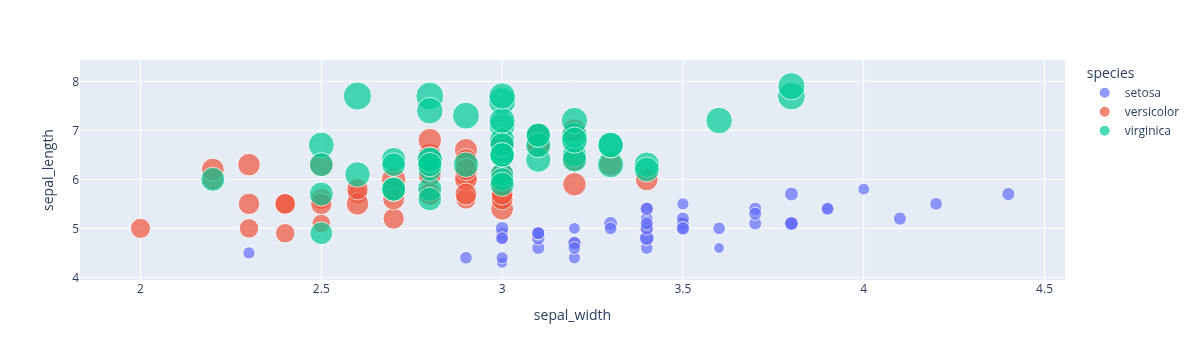

In [63]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species",
                 size='petal_length', hover_data=['petal_width'])
fig.show()

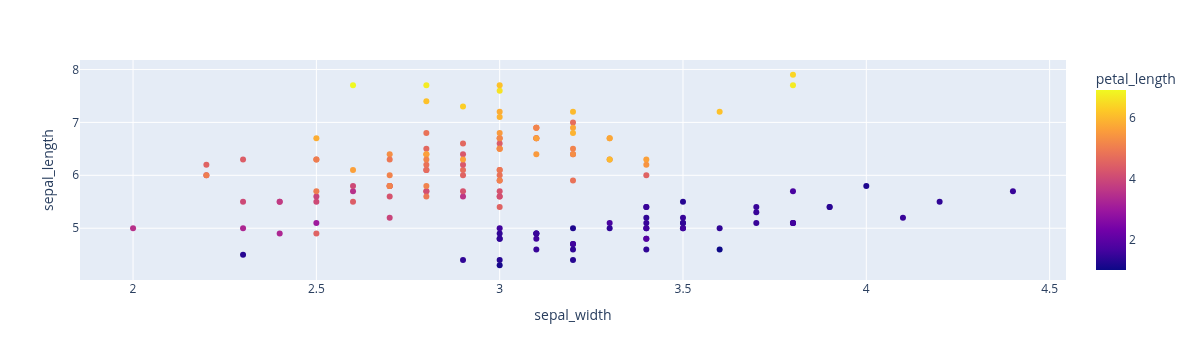

In [64]:
fig = px.scatter(df, x="sepal_width", y="sepal_length", color='petal_length')
fig.show()

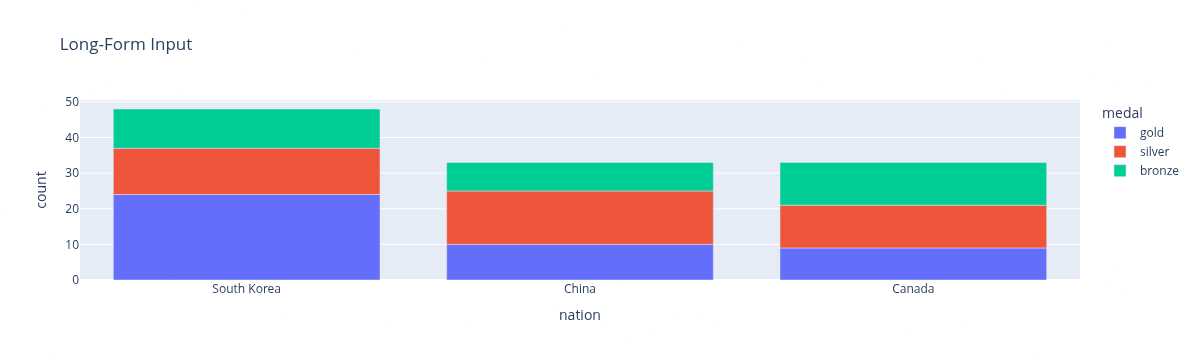

In [65]:
long_df = px.data.medals_long()

fig = px.bar(long_df, x="nation", y="count", color="medal", title="Long-Form Input")
fig.show()

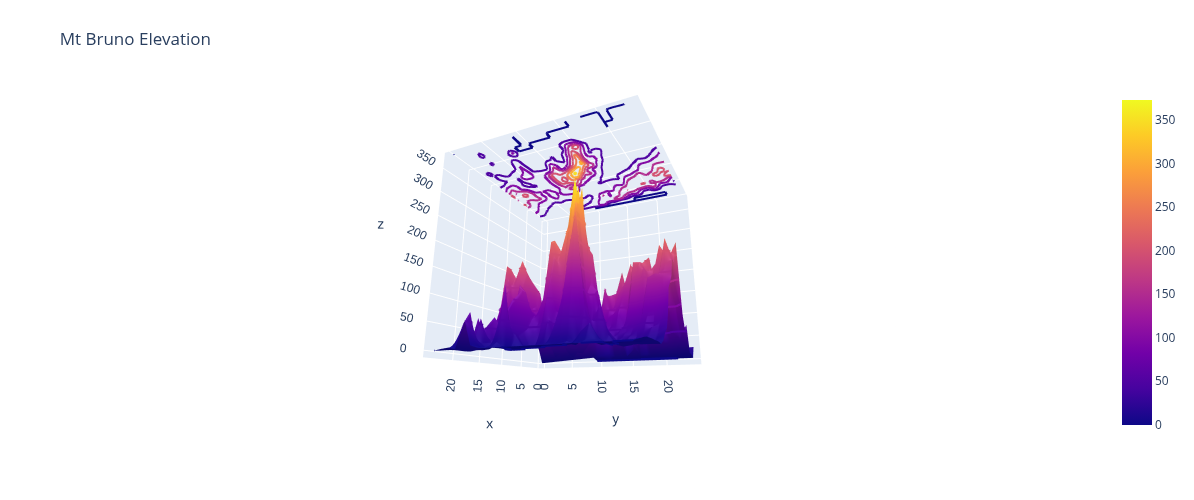

In [66]:
import plotly.graph_objects as go

import pandas as pd

# Read data from a csv
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

fig = go.Figure(data=[go.Surface(z=z_data.values)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title=dict(text='Mt Bruno Elevation'), autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90)
)

fig.show()

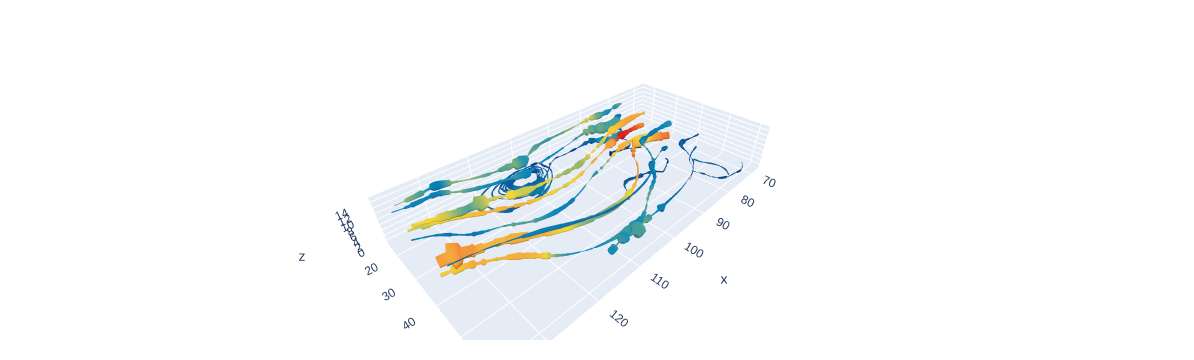

In [67]:
import plotly.graph_objects as go

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/streamtube-wind.csv').drop(['Unnamed: 0'],axis=1)

fig = go.Figure(data=go.Streamtube(
    x = df['x'],
    y = df['y'],
    z = df['z'],
    u = df['u'],
    v = df['v'],
    w = df['w'],
    starts = dict(
        x = [80] * 16,
        y = [20,30,40,50] * 4,
        z = [0,0,0,0,5,5,5,5,10,10,10,10,15,15,15,15]
    ),
    sizeref = 0.3,
    colorscale = 'Portland',
    showscale = False,
    maxdisplayed = 3000
))

fig.update_layout(
    scene = dict(
        aspectratio = dict(
            x = 2,
            y = 1,
            z = 0.3
        )
    ),
    margin = dict(
        t = 20,
        b = 20,
        l = 20,
        r = 20
    )
)

fig.show()